### Feature Engineering and outlier removal.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
path="C:\\Users\MyPc\\Desktop\\Project-Housing_splitted\\train.csv"
data_train=pd.read_csv(path)
path="C:\\Users\MyPc\\Desktop\\Project-Housing_splitted\\test.csv"
data_test=pd.read_csv(path)

In [3]:
data_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [4]:
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].median())
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mode()[0])


In [5]:
data_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,70.0,11341,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,118500


In [6]:
data_train.drop(['Alley'],axis=1,inplace=True)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [7]:
data_train.drop(['PoolQC'],axis=1,inplace=True)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,224,0,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,6,2009,WD,Normal,215000


In [8]:
data_train.drop(['MiscFeature'],axis=1,inplace=True)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,224,0,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,6,2009,WD,Normal,215000


In [9]:
data_train['BsmtQual']=data_train['BsmtQual'].fillna(0)
data_train['BsmtQual'].isna().sum()

0

In [10]:
data_train['BsmtQual']

0       Gd
1       TA
2       Gd
3       Gd
4       Gd
        ..
1163    TA
1164     0
1165    Gd
1166    TA
1167    Gd
Name: BsmtQual, Length: 1168, dtype: object

In [11]:
data_test['BsmtQual']=data_test['BsmtQual'].fillna(0)

In [12]:
data_train['BsmtCond']=data_train['BsmtCond'].fillna(0)
data_train['BsmtExposure']=data_train['BsmtExposure'].fillna(0)
data_train['BsmtFinType1']=data_train['BsmtFinType1'].fillna(0)
data_train['BsmtFinType2']=data_train['BsmtFinType2'].fillna(0)
data_train['FireplaceQu']=data_train['FireplaceQu'].fillna(0)
data_train['GarageType']=data_train['GarageType'].fillna(0)
data_train['GarageYrBlt']=data_train['GarageYrBlt'].fillna(0)
data_train['GarageFinish']=data_train['GarageFinish'].fillna(0)
data_train['GarageQual']=data_train['GarageQual'].fillna(0)
data_train['GarageCond']=data_train['GarageCond'].fillna(0)
data_train['Fence']=data_train['Fence'].fillna(0)


In [13]:
df_tr=[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','Fence']]

In [14]:
df_ts=[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','Fence']]

In [15]:
data_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

In [16]:
data_test['BsmtCond']=data_test['BsmtCond'].fillna(0)
data_test['BsmtExposure']=data_test['BsmtExposure'].fillna(0)
data_test['BsmtFinType1']=data_test['BsmtFinType1'].fillna(0)
data_test['BsmtFinType2']=data_test['BsmtFinType2'].fillna(0)
data_test['FireplaceQu']=data_test['FireplaceQu'].fillna(0)
data_test['GarageType']=data_test['GarageType'].fillna(0)
data_test['GarageYrBlt']=data_test['GarageYrBlt'].fillna(0)
data_test['GarageFinish']=data_test['GarageFinish'].fillna(0)
data_test['GarageQual']=data_test['GarageQual'].fillna(0)
data_test['GarageCond']=data_test['GarageCond'].fillna(0)
data_test['Fence']=data_test['Fence'].fillna(0)


In [17]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,70.0,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,224,0,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,422,20,RL,70.0,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,New,Partial,219210
6,561,20,RL,70.0,11341,Pave,IR1,Lvl,AllPub,Inside,...,0,95,0,0,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,GdPrv,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,GdPrv,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2008,COD,Abnorml,118500


In [18]:
data_train['Fence'].value_counts()

0        931
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [19]:
data_test.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [20]:
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].median())

In [21]:
data_test['BsmtCond'].value_counts()

TA    270
Gd      9
0       7
Fa      6
Name: BsmtCond, dtype: int64

In [22]:
data_test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,0,NaN,0,7,2007,WD,Normal
1,1018,120,RL,65.0,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,0,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,65.0,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,0,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,0,NaN,0,1,2008,WD,Normal
5,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal
6,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,5,2006,WD,Normal
7,152,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,1,2008,New,Partial
8,427,80,RL,65.0,12800,Pave,NaN,Reg,Low,AllPub,...,396,0,NaN,0,NaN,0,8,2009,WD,Normal
9,776,120,RM,32.0,4500,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,0,NaN,0,6,2009,WD,Normal


In [23]:
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(data_test['LotFrontage'].median())
data_test['MasVnrArea'] = data_test['MasVnrArea'].fillna(data_test['MasVnrArea'].mode()[0])

In [24]:
data_test.drop(['Alley'],axis=1,inplace=True)
data_test.drop(['PoolQC'],axis=1,inplace=True)
data_test.drop(['MiscFeature'],axis=1,inplace=True)

In [25]:
data_test.shape

(292, 77)

In [26]:
data_train.shape

(1168, 78)

In [27]:
##Getting all the categorical columns together.
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir','Fence',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
con_df=pd.concat([data_train,data_test],axis=0) ##concatinating the datasets(train and test).

### For same columns in test and train there are differnt value counts of categories.

In [29]:
##Applying one_hot_encoding to all the columns.
def category_onehot_multcols(multcolumns):
    df_con=con_df
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(con_df[fields],drop_first=True)
        con_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_con=df1.copy()
        else:
            df_con=pd.concat([df_con,df1],axis=1)
        i=i+1
    df_con=pd.concat([con_df,df_con],axis=1)
        
    return df_con

In [30]:
con_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Fence
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [31]:
con_df =con_df.loc[:,~con_df.columns.duplicated()]## removing the duplicat columns.

In [32]:
con_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,P
0,127,120,70.0,4928,6,5,1976,1976,0.0,120,...,1,0,1,0,0,0,0,0,1,0
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,1,0,1,0,0,0,0,0,0,0
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,1,0,1,0,0,0,0,0,0,0
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,1,0,1,0,0,0,0,0,1,0
4,422,20,70.0,16635,6,7,1977,2000,126.0,1246,...,1,0,1,0,0,0,0,1,0,0


In [33]:
### Need to seperate the train and test dataset again.
df_Train=con_df.iloc[:1168,:]
df_Test=con_df.iloc[1168:,:]

In [34]:
df_Train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,P
0,127,120,70.0,4928,6,5,1976,1976,0.0,120,...,1,0,1,0,0,0,0,0,1,0
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,1,0,1,0,0,0,0,0,0,0
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,1,0,1,0,0,0,0,0,0,0
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,1,0,1,0,0,0,0,0,1,0
4,422,20,70.0,16635,6,7,1977,2000,126.0,1246,...,1,0,1,0,0,0,0,1,0,0


In [35]:
df_Test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Typ,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,Fin,RFn,P
0,337,20,86.0,14157,9,5,2005,2006,200.0,1249,...,1,0,1,0,0,0,0,1,0,0
1,1018,120,65.0,5814,8,5,1984,1984,0.0,1036,...,1,0,1,0,0,0,0,0,1,0
2,929,20,65.0,11838,8,5,2001,2001,0.0,0,...,1,0,1,0,0,0,0,0,1,0
3,1148,70,75.0,12000,7,7,1941,1950,0.0,275,...,1,0,1,0,0,0,0,0,0,0
4,1227,60,86.0,14598,6,5,2007,2007,74.0,0,...,1,0,0,0,1,0,0,1,0,0


In [36]:
df_Test['SalePrice'] ### to remove the column as it contains nan values. 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
287   NaN
288   NaN
289   NaN
290   NaN
291   NaN
Name: SalePrice, Length: 292, dtype: float64

In [37]:
df_Test.drop(['SalePrice'],axis=1, inplace=True)

In [38]:
df_Test.shape

(292, 186)

In [39]:
df_Train.shape

(1168, 187)

In [40]:
### Seperating into x and y 
x=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

In [41]:
df_Train.skew()

Id              0.026526
MSSubClass      1.422019
LotFrontage     2.733440
LotArea        10.659285
OverallQual     0.175082
                 ...    
CarPort        11.973932
Detchd          1.044139
Fin             1.231948
RFn             0.925502
P               6.922843
Length: 187, dtype: float64

In [42]:
df_Train.skew()

Id              0.026526
MSSubClass      1.422019
LotFrontage     2.733440
LotArea        10.659285
OverallQual     0.175082
                 ...    
CarPort        11.973932
Detchd          1.044139
Fin             1.231948
RFn             0.925502
P               6.922843
Length: 187, dtype: float64

In [43]:
#getting the skewed columns together.
features=["MSSubClass","LotFrontage","MasVnrArea","LotArea","OverallQual","CarPort","Detchd","Fin","RFn","P","BsmtFinSF2","BsmtUnfSF","GrLivArea","OpenPorchSF","EnclosedPorch","WoodDeckSF","ScreenPorch","1stFlrSF","2ndFlrSF","GarageYrBlt","GarageArea","SalePrice"]

In [44]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [45]:
df_Train[features]=pt.fit_transform(df_Train[features].values)

In [46]:
df_Train[features]

,MSSubClass,LotFrontage,MasVnrArea,LotArea,OverallQual,CarPort,Detchd,Fin,RFn,P,...,GrLivArea,OpenPorchSF,EnclosedPorch,WoodDeckSF,ScreenPorch,1stFlrSF,2ndFlrSF,GarageYrBlt,GarageArea,SalePrice
0,1.370435,0.057324,-0.812901,-1.213954,-0.052799,-0.083045,-0.606367,-0.558891,1.563786,-0.14173,...,-1.236502,1.409990,-0.411301,-0.959773,-0.297551,-0.458345,-0.871745,0.231550,-0.113082,-0.671353
1,-1.167999,1.125853,-0.812901,1.100521,1.345826,-0.083045,-0.606367,-0.558891,-0.639474,-0.14173,...,1.295050,1.414498,-0.411301,0.781991,3.360787,2.122554,-0.871745,0.195214,0.678810,1.181174
2,0.490047,1.007841,-0.812901,0.158048,0.656375,-0.083045,-0.606367,-0.558891,-0.639474,-0.14173,...,1.003880,1.198911,-0.411301,1.043999,-0.297551,0.058641,1.176207,0.336336,-0.045422,1.197587
3,-1.167999,1.502999,1.390202,0.496002,-0.052799,-0.083045,-0.606367,-0.558891,1.563786,-0.14173,...,0.739356,1.169545,-0.411301,-0.959773,-0.297551,1.574554,-0.871745,0.231550,0.356726,0.326442
4,-1.167999,0.057324,1.155573,1.196626,-0.052799,-0.083045,-0.606367,1.789257,-0.639474,-0.14173,...,0.314931,-1.061392,-0.411301,1.135369,-0.297551,1.149105,-0.871745,0.231550,0.282610,0.635122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-1.167999,0.057324,0.813623,0.137703,-0.785224,-0.083045,1.649165,-0.558891,-0.639474,-0.14173,...,-1.424968,-1.061392,-0.411301,-0.959773,-0.297551,-0.659343,-0.871745,0.195214,-0.865892,-0.793827
1164,-1.167999,-0.086299,-0.812901,-0.084786,-1.545782,-0.083045,1.649165,1.789257,-0.639474,-0.14173,...,-0.748915,1.058911,-0.411301,-0.959773,-0.297551,0.055839,-0.871745,0.362758,0.243193,-1.105952
1165,1.700798,-2.858557,-0.812901,-2.681835,-0.052799,-0.083045,-0.606367,-0.558891,-0.639474,-0.14173,...,0.026617,-1.061392,-0.411301,0.805928,-0.297551,-0.825373,1.100701,0.226348,-0.113082,-0.294032
1166,0.696557,-0.988264,-0.812901,-0.148203,-1.545782,-0.083045,1.649165,-0.558891,-0.639474,-0.14173,...,-0.276125,0.794809,2.433344,-0.959773,-0.297551,-1.732506,1.121628,-0.059231,-1.015037,-3.713394


In [47]:
df_Train.skew()

Id              0.026526
MSSubClass      0.064007
LotFrontage     0.155904
LotArea         0.032509
OverallQual     0.021658
                 ...    
CarPort        11.973932
Detchd          1.044139
Fin             1.231948
RFn             0.925502
P               6.922843
Length: 187, dtype: float64

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'CarPort'}>,
        <AxesSubplot:title={'center':'Detchd'}>,
        <AxesSubplot:title={'center':'Fin'}>,
        <AxesSubplot:title={'center':'RFn'}>,
        <AxesSubplot:title={'center':'P'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>],
       [<AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:t

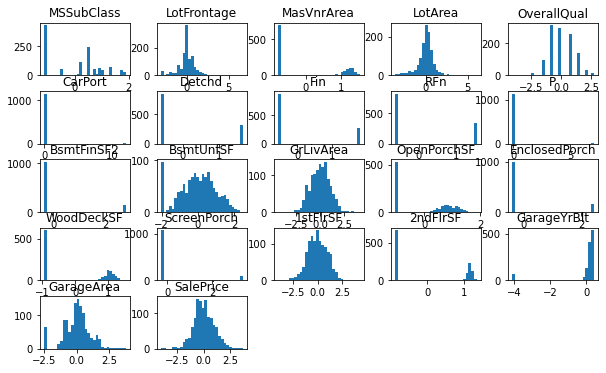

In [48]:
df_Train[features].hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [49]:
df_Test.skew()

Id             -0.108806
MSSubClass      1.358597
LotFrontage     0.499491
LotArea        12.781805
OverallQual     0.397312
                 ...    
CarPort        17.088007
Detchd          1.160671
Fin             1.139615
RFn             0.961608
P               6.256238
Length: 186, dtype: float64

In [50]:
features=["MSSubClass","LotFrontage","LotArea","OverallQual","CarPort","Detchd","Fin","RFn","P","MasVnrArea","BsmtFinSF2","BsmtUnfSF","GrLivArea","OpenPorchSF","EnclosedPorch","WoodDeckSF","ScreenPorch","MiscVal"]

##### We can see that the data set is more or less distributed .

In [51]:
df_Test[features]=pt.fit_transform(df_Test[features].values)
df_Test.skew()

Id             -0.108806
MSSubClass      0.089921
LotFrontage     0.095101
LotArea         0.003111
OverallQual    -0.002016
                 ...    
CarPort        17.088007
Detchd          1.160671
Fin             1.139615
RFn             0.961608
P               6.256238
Length: 186, dtype: float64

In [52]:
#Dropping the'Id' columns
df_Test.drop(["Id"],axis=1,inplace=True)
df_Train.drop(['Id'],axis=1,inplace=True)

In [53]:
##Need to remove 'CarPort' as it is highly skewed so its better to remove it. 
df_Test.drop(['CarPort'],axis=1,inplace=True)
df_Train.drop(['CarPort'],axis=1,inplace=True)

In [54]:
x=df_Train.drop(['SalePrice'],axis=1)
y=df_Train['SalePrice']

In [55]:
df_Train.isna()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min2,Typ,2Types,Attchd,Basment,BuiltIn,Detchd,Fin,RFn,P
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1165,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
x_scaled=MM.fit_transform(x)

In [57]:
df_Test.shape

(292, 184)

In [58]:
#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


##### Hold out Method 

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

In [60]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.8221072124185086


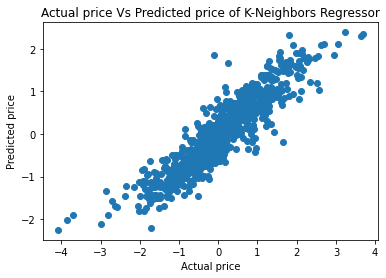

In [61]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of K-Neighbors Regressor')
plt.show()

In [62]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of knn :',kn_accuracy*100)
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

R Square Score of K-Neighbors Regressor: 0.6365330069485454
Accuracy of knn : 63.65330069485454
mean absolute error of K-Neighbors Regressor is:  0.4209291857920949
mean squared error of K-Neighbors Regressor is:  0.32811949881131136
Root mean squared error of K-Neighbors Regressor is:  0.5728171600181958


In [63]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.980736090979461


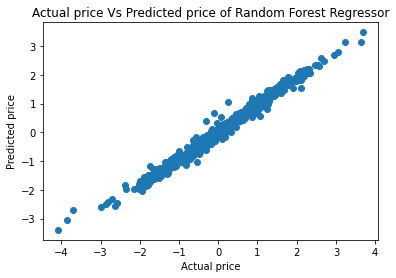

In [64]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Random Forest Regressor')
plt.show()

In [65]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

In [66]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.8154787468318013
Accuracy of RFR : 81.54787468318013


In [67]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

mean absolute error of Random Forest Regressor:  0.28600409906330826
mean squared error of Random Forest Regressor is:  0.16657639418997622
Root mean squared error of Random Forest Regressor is:  0.40813771473606336


In [68]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
#Model Prediction with trained data:
y_dt_pred = dt.predict(x_train)
print("R Square Score of Decision Tree Regressor: ",metrics.r2_score(y_train,y_dt_pred))

R Square Score of Decision Tree Regressor:  1.0


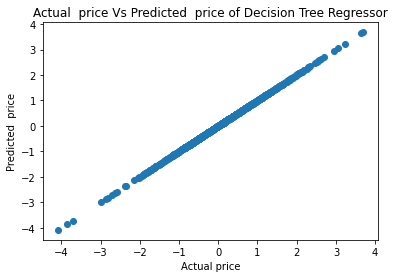

In [69]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_dt_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted  price')
plt.title('Actual  price Vs Predicted  price of Decision Tree Regressor')
plt.show()

In [70]:
# Predicting test data with model:
y_test_dt_pred = dt.predict(x_test)
dt_accuracy = metrics.r2_score(y_test,y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)
print ('mean absolute error of Decision Tree Regressor: ',mean_absolute_error(y_test,y_test_dt_pred))
print ('mean squared error of Decision Tree Regressor: ',mean_squared_error(y_test,y_test_dt_pred))
print ('Root mean squared error of Decision Tree Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_dt_pred)))

R Square Score of Decision Tree Regressor: 0.6581226573805194
Accuracy of dt : 65.81226573805195
mean absolute error of Decision Tree Regressor:  0.4009941988928543
mean squared error of Decision Tree Regressor:  0.308629461436039
Root mean squared error of Decision Tree Regressor:  0.5555442929560513


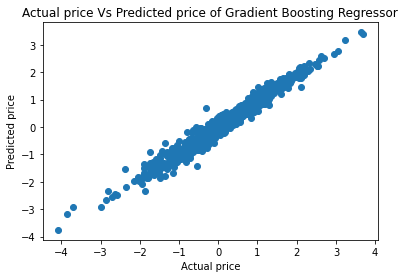

In [71]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs Predicted price of Gradient Boosting Regressor')
plt.show()

In [72]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

R Square Score of Gradient Boosting Regressor: 0.842788728470662
Accuracy of GBR : 84.2788728470662
mean absolute error of Gradient Boosting Regressor:  0.265764718504735
mean squared error of Gradient Boosting Regressor is:  0.14192233299817908
Root mean squared error of Gradient Boosting Regressor:  0.37672580612187834


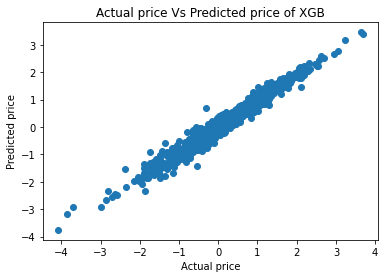

In [75]:
##Regularization using Lasso:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)
#best alpha parameter
alpha = lasscv.alpha_
alpha
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.8886507166476835

In [76]:
##Regularization Using Ridge:
from array import array
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridge_alpha= ridgecv.alpha_
ridge_alpha
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.8833636757623406

In [77]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('kn_cv_mean :',kn_cv_score.mean()*100)
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('rf_cv_mean :',rf_cv_score.mean()*100)
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('gbr_cv_mean :',gbr_cv_score.mean()*100)
dt_cv_score = cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('dt_cv_mean :',dt_cv_score.mean()*100)

[0.68988129 0.69884883 0.71977547 0.69146983 0.74632864]
kn_cv_mean : 70.92608126237623
[0.84029095 0.84618529 0.90577938 0.82032603 0.89198144]
rf_cv_mean : 86.09126196038697
[0.85663646 0.8683001  0.92190653 0.8463619  0.91605469]
gbr_cv_mean : 88.18519345492872
[0.71776603 0.73579133 0.70318607 0.67138304 0.80463462]
dt_cv_mean : 72.65522179851403


#### Of the four models created and trained now the differnce between  each of the model's r2 score and cv_mean will be found and the least scoring model will be selected as the model for hypertunning and will later on be used to  predict the test data. 

In [78]:
KNN= (kn_accuracy*100)-(kn_cv_score.mean()*100)
print(KNN)

-7.272780567521686


In [79]:
RF=(rf_accuracy*100)-(rf_cv_score.mean()*100)
print(RF)

-4.543387277206847


In [80]:
DT= (dt_accuracy*100)- (dt_cv_score.mean()*100)
print(DT)

-6.842956060462086


In [81]:
GBR=(gbr_accuracy*100) -(gbr_cv_score.mean()*100)
print(GBR)

-3.9063206078625257


### Hyperparameter tunning for DecisionTreeRegressor using GridSearchCV.

In [82]:
grid_param={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dt = DecisionTreeRegressor()
gbr_search=GridSearchCV(dt,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(x_train,y_train)
gbr_search.best_estimator_

DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=70,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1)

In [83]:
dtr= DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=70,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1)

dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
58.319445803667726


In [84]:
x_test= df_Test

In [85]:
dtr= DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=70,
                      min_samples_leaf=10, min_weight_fraction_leaf=0.1)

dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
-46.13100154273128
